In [1]:
import h5py as hdf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob 
import seaborn as sns
#import netCDF as cdf 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


:0: FutureWarning: IPython widgets are experimental and may change in the future.


# Looking at the simulated spectra that was given to the Algorithm
- The synthetic spectra was generated in DISAMAR. 1000 iterations were performed twice, for a case with fluorescence and without.
- The observations for GOME2a are for 2009-01-01

In [4]:
dis_sim_1000 = pd.read_csv('/usr/people/botiabo/DISAMAR/config/Sahara_1000hpa/storage.csv')
dis_sim_800  = pd.read_csv('/usr/people/botiabo/DISAMAR/config/Sahara_800hpa/storage.csv')
dis_sim_700  = pd.read_csv('/usr/people/botiabo/DISAMAR/config/Sahara_700hpa/storage.csv')
dis_sim_600  = pd.read_csv('/usr/people/botiabo/DISAMAR/config/Sahara_600hpa/storage.csv')
dis_sim_400  = pd.read_csv('/usr/people/botiabo/DISAMAR/config/Sahara_400hpa/storage.csv')
dis_sim_600n = pd.read_csv('/usr/people/botiabo/DISAMAR/config/Sahara_600hpa_new/storage.csv')
dis_sim_700n = pd.read_csv('/usr/people/botiabo/DISAMAR/config/Sahara_700hpa_new/storage.csv')

In [12]:
#h2o_column = [dis_sim_1000,dis_sim_800,dis_sim_700,dis_sim_700n,dis_sim_600,dis_sim_600n,dis_sim_400]
h2o_column = [dis_sim_700,dis_sim_700n,dis_sim_600,dis_sim_600n,]
label      =['700','700new','600','600new']
for k,i in enumerate(h2o_column):
    #info = i['h2o_column'].describe()
    print 'water vapour column mean %s ='%(label[k]),i['h2o_column'].mean()
    


water vapour column mean 700 7.2526
water vapour column mean 700new 7.1915
water vapour column mean 600 7.3698
water vapour column mean 600new 7.4132


In [3]:
# Selecting saharan pixels

rad6    = '/usr/people/botiabo/botiabo/data_SIF/M02/gome2_level1b/2009/MOS_fluor_l1b_2009_01_01'
wav_obs = pd.read_csv('/usr/people/botiabo/Fluor_retrieval/Input/wavelength.txt','r',header=None)

data    = hdf.File(rad6,'r') 

for i in data:
    print (i)

wav = np.array(data['level1b/wavelength'])
rad = np.array(data['level1b/rad'])
lat = np.array(data['level1b/lat'])
lon = np.array(data['level1b/lon'])
print wav.shape,rad.shape,lat.shape,lon.shape
rad_saha = []

for i in range(len(lat)):
    if 16.0 <= lat[i] <= 30.0 and  -8.0 <= lon[i] <= 29.0:
        rad_saha.append(rad[i])

rad_sahara = np.array(rad_saha)
print rad_sahara.shape
rad_sahara = np.delete(rad_sahara, (92), axis=0)
rad_sahara = np.delete(rad_sahara,(743),axis=0)
rad_sahara = np.delete(rad_sahara,(742),axis=0)

cloud
level1b
(1, 1024) (134437, 1024) (134437, 1) (134437, 1)
(1340, 1024)


In [4]:
# calculating std and checking that there are not negatives
rad_sahara.mean(axis=1).shape
rad_sahara_std = rad_sahara.std(axis=0)
for k,i in enumerate(rad_sahara):
    if rad_sahara[k][0] < 0:
        print k
    

/usr/people/botiabo/DISAMAR/salida/DIS_Sahara_600hpa_new/Sahara_600hpa.hdf
/usr/people/botiabo/DISAMAR/salida/DIS_Sahara_700hpa_new/Sahara_700hpa.hdf
/usr/people/botiabo/DISAMAR/salida/DIS_Sahara_800hpa/Sahara_800hpa.hdf
/usr/people/botiabo/DISAMAR/salida/DIS_Sahara_400hpa/Sahara_400hpa.hdf
/usr/people/botiabo/DISAMAR/salida/DIS_Sahara_1000hpa/Sahara_1000hpa.hdf


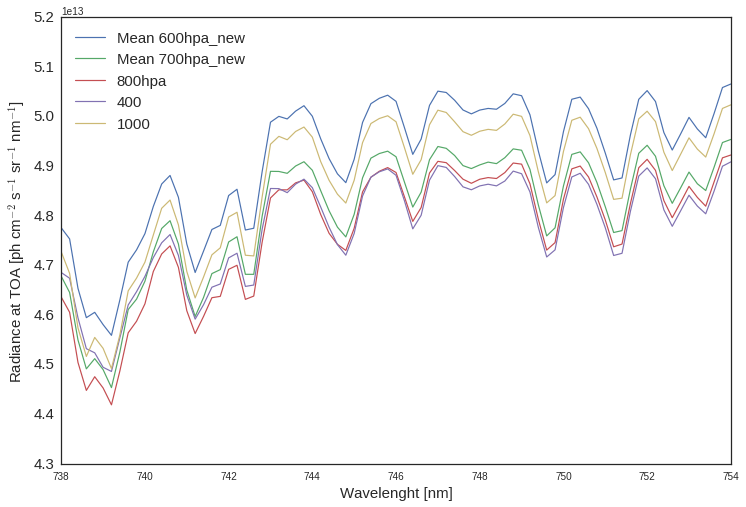

In [37]:
fig     = plt.figure(1,figsize = (12,8))
sns.set_style('white')

#l    = ['Mean 400hpa','Mean 600hpa','Mean 700hpa','Mean 800hpa','Mean 1000hpa','Mean All_hpa']
l    = ['Mean 600hpa_new','Mean 700hpa_new','800hpa','400','1000']#,'Mean 1000hpa','Mean All_hpa']
#l = ['400','600','700','800','1000','All']

rad1 = '/usr/people/botiabo/DISAMAR/salida/DIS_Sahara_600hpa/Sahara_600hpa.hdf'
rad2 = '/usr/people/botiabo/DISAMAR/salida/DIS_Sahara_600hpa_new/Sahara_600hpa.hdf'
rad3 = '/usr/people/botiabo/DISAMAR/salida/DIS_Sahara_700hpa/Sahara_700hpa.hdf'
rad4 = '/usr/people/botiabo/DISAMAR/salida/DIS_Sahara_700hpa_new/Sahara_700hpa.hdf'
rad5 = '/usr/people/botiabo/DISAMAR/salida/DIS_Sahara_800hpa/Sahara_800hpa.hdf'
rad6 = '/usr/people/botiabo/DISAMAR/salida/DIS_Sahara_400hpa/Sahara_400hpa.hdf'
rad7 = '/usr/people/botiabo/DISAMAR/salida/DIS_Sahara_1000hpa/Sahara_1000hpa.hdf'


zoom = True
rads = [rad2,rad4,rad5,rad6,rad7]#,rad5,rad6]#1,rad2,rad3]#,rad3,rad4,rad5,rad6]
counter = 0
rand = randint(0,999)
color = ['grey','lightgreen','orange']
for f in rads:
    print f
    data    = hdf.File(f,'r') 
    wav     = np.array(data['level1b/wavelength'])
    rad     = np.array(data['level1b/rad'])
    rad_std = rad.std(axis=0)
    plt.plot(wav[0],np.median(rad,axis=0),label=l[counter],linewidth=1.2)
    
    #plt.fill_between(wav[0], rad.mean(axis=0)-rad_std, rad.mean(axis=0)+rad_std,color=color[counter],alpha=0.5)
    #plt.plot(wav[0],rad[rand],label=l[counter],linewidth=1.2)
    plt.xlim(701,790)
    
    counter += 1

#rand_pixel = randint(0,1340)
#plt.plot(wav_obs, rad_sahara[rand_pixel],label='GOME2a - Pixel %i'%(rand_pixel)) # random pixel within the sahara    
#plt.plot(wav_obs, rad_sahara.mean(axis=0),label='Mean GOME2a')
#plt.fill_between(wav_obs[0], rad_sahara.mean(axis=0)-rad_sahara_std , rad_sahara.mean(axis=0)+rad_sahara_std,
#                 label='GOME2a std band',color='lightgray',alpha=0.5)
#plt.title('Average radiance at the TOA (1000 iterations)',fontsize=15)

if zoom:
    plt.xlim(738,754)
    plt.ylim(4.3e13,5.2e13)
plt.xlabel('Wavelenght [nm]',fontsize=15)
plt.ylabel('Radiance at TOA [ph cm$^{-2}$ s$^{-1}$ sr$^{-1}$ nm$^{-1}$]',fontsize=15)
plt.yticks(fontsize=15)
plt.yticks(fontsize=15)

if zoom: 
    plt.legend(loc = 'upper left',fontsize=15)
#    fig.savefig('/usr/people/botiabo/Notebooks_Scripts/Report/FittingWindowSyntheticSpectra-GOME2.png',bbox_inches='tight',DPI=1000)
if not zoom:
    plt.legend(loc = 'lower left',fontsize=15)
#    fig.savefig('/usr/people/botiabo/Notebooks_Scripts/Report/SyntheticSpectra-GOME2.png',bbox_inches='tight',DPI=1000)

# The latter confirms that the unexpected results on the synthetic spectra are highly dependent on the random nature of the 1000 simulations

/usr/people/botiabo/DISAMAR/salida/DIS_Sahara_400hpa/Sahara_400hpa.hdf
/usr/people/botiabo/DISAMAR/salida/DIS_Sahara_600hpa/Sahara_600hpa.hdf
/usr/people/botiabo/DISAMAR/salida/DIS_Sahara_700hpa/Sahara_700hpa.hdf
/usr/people/botiabo/DISAMAR/salida/DIS_Sahara_800hpa/Sahara_800hpa.hdf
/usr/people/botiabo/DISAMAR/salida/DIS_Sahara_1000hpa/Sahara_1000hpa.hdf
/usr/people/botiabo/DISAMAR/salida/DIS_Sahara_all_hpa/Sahara_all_hpa.hdf


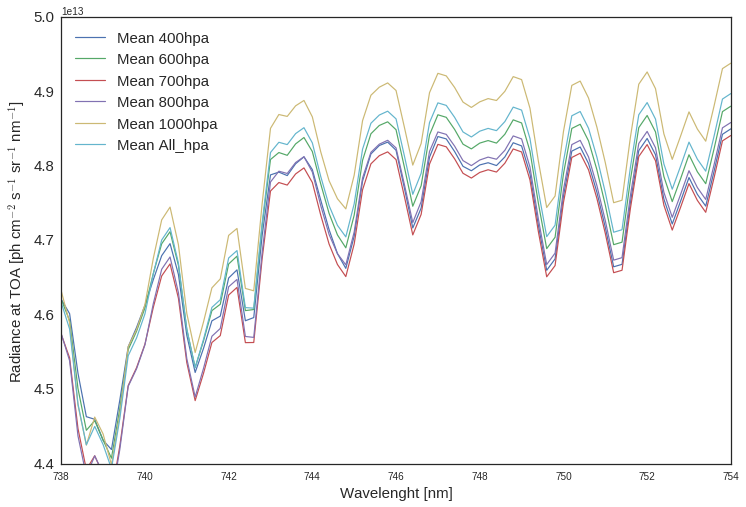

In [52]:
fig     = plt.figure(1,figsize = (12,8))
sns.set_style('white')

l    = ['Mean 400hpa','Mean 600hpa','Mean 700hpa','Mean 800hpa','Mean 1000hpa','Mean All_hpa']
#l = ['400','600','700','800','1000','All']
rad1 = '/usr/people/botiabo/DISAMAR/salida/DIS_Sahara_400hpa/Sahara_400hpa.hdf'
rad2 = '/usr/people/botiabo/DISAMAR/salida/DIS_Sahara_600hpa/Sahara_600hpa.hdf'
rad3 = '/usr/people/botiabo/DISAMAR/salida/DIS_Sahara_700hpa/Sahara_700hpa.hdf'
rad4 = '/usr/people/botiabo/DISAMAR/salida/DIS_Sahara_800hpa/Sahara_800hpa.hdf'
rad5 = '/usr/people/botiabo/DISAMAR/salida/DIS_Sahara_1000hpa/Sahara_1000hpa.hdf'
rad6 = '/usr/people/botiabo/DISAMAR/salida/DIS_Sahara_all_hpa/Sahara_all_hpa.hdf'


zoom = True
rads = [rad1,rad2,rad3,rad4,rad5,rad6]#1,rad2,rad3]#,rad3,rad4,rad5,rad6]
counter = 0
rand = randint(0,999)
color = ['grey','lightgreen','orange']
for f in rads:
    print f
    data    = hdf.File(f,'r') 
    wav     = np.array(data['level1b/wavelength'])
    rad     = np.array(data['level1b/rad'])
    rad_std = rad.std(axis=0)
    plt.plot(wav[0],rad.mean(axis=0),label=l[counter],linewidth=1.2)
    
    #plt.fill_between(wav[0], rad.mean(axis=0)-rad_std, rad.mean(axis=0)+rad_std,color=color[counter],alpha=0.5)
    
    #plt.plot(wav[0],rad[rand],label=l[counter],linewidth=1.2)
    plt.xlim(701,790)
    counter += 1

#rand_pixel = randint(0,1340)
#plt.plot(wav_obs, rad_sahara[rand_pixel],label='GOME2a - Pixel %i'%(rand_pixel)) # random pixel within the sahara    
#plt.plot(wav_obs, rad_sahara.mean(axis=0),label='Mean GOME2a')
#plt.fill_between(wav_obs[0], rad_sahara.mean(axis=0)-rad_sahara_std , rad_sahara.mean(axis=0)+rad_sahara_std,
#                 label='GOME2a std band',color='lightgray',alpha=0.5)
#plt.title('Average radiance at the TOA (1000 iterations)',fontsize=15)

if zoom:
    plt.xlim(738,754)
    plt.ylim(4.4e13,5e13)
plt.xlabel('Wavelenght [nm]',fontsize=15)
plt.ylabel('Radiance at TOA [ph cm$^{-2}$ s$^{-1}$ sr$^{-1}$ nm$^{-1}$]',fontsize=15)
plt.yticks(fontsize=15)
plt.yticks(fontsize=15)

if zoom: 
    plt.legend(loc = 'upper left',fontsize=15)
#    fig.savefig('/usr/people/botiabo/Notebooks_Scripts/Report/FittingWindowSyntheticSpectra-GOME2.png',bbox_inches='tight',DPI=1000)
if not zoom:
    plt.legend(loc = 'lower left',fontsize=15)
#    fig.savefig('/usr/people/botiabo/Notebooks_Scripts/Report/SyntheticSpectra-GOME2.png',bbox_inches='tight',DPI=1000)

# Note that the simulations in DISAMAR are for a SAHARAN atmosphere but varying the surface pressure

In [9]:
#Reading the dataframes

df400      = pd.read_pickle('dataframes/df_400')
df600      = pd.read_pickle('dataframes/df_600')
df700      = pd.read_pickle('dataframes/df_700')
df800      = pd.read_pickle('dataframes/df_800')
df1000     = pd.read_pickle('dataframes/df_1000')
dfall      = pd.read_pickle('dataframes/df_all')

dataframes = [dfall,df400,df600,df700,df800,df1000]

# Plotting the information of the level 2 data-DISAMAR

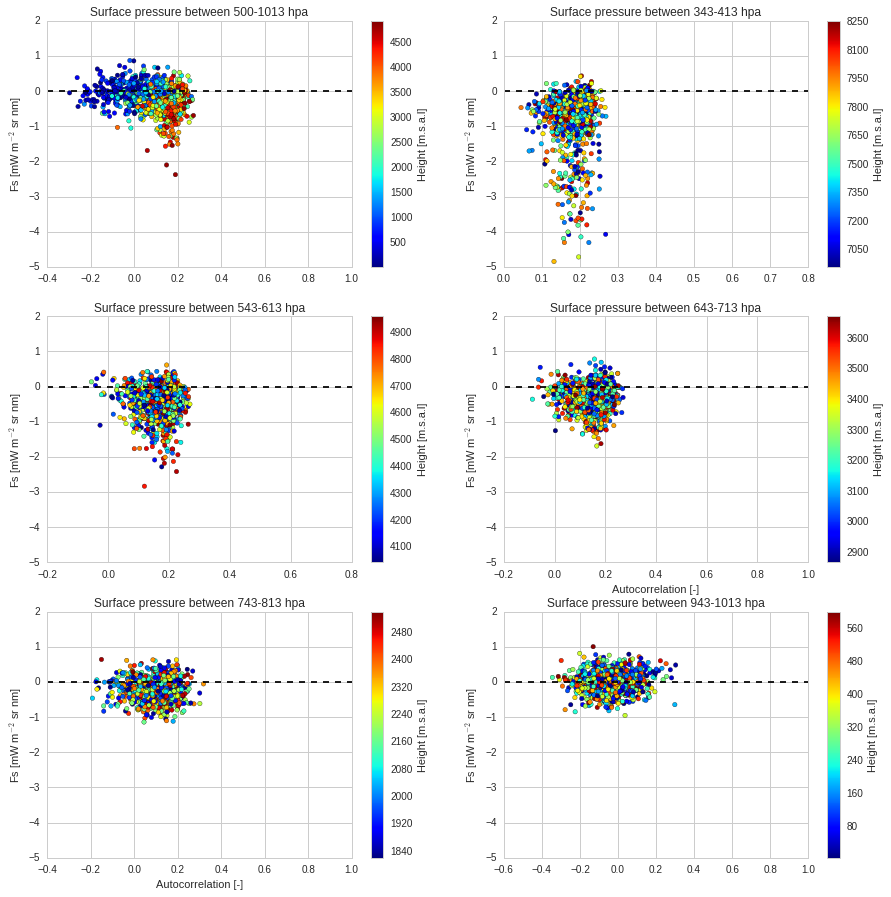

In [10]:
f     = plt.figure(1, figsize = (15,15))
sns.set_style('whitegrid')
title = ['Surface pressure between 500-1013 hpa',
         'Surface pressure between 343-413 hpa',
         'Surface pressure between 543-613 hpa',
         'Surface pressure between 643-713 hpa',
         'Surface pressure between 743-813 hpa',
         'Surface pressure between 943-1013 hpa' ]

counter = 321
for k,i in enumerate(dataframes):
    plt.subplot(counter)
    plt.scatter(i['Autocorr'],i['Fs']*1000,c=i['height'],cmap='jet')
    plt.ylim(-5,2)
    plt.ylabel('Fs [mW m$^{-2}$ sr nm]')
    plt.title(title[k],loc='center',verticalalignment='baseline',fontsize=12)
    plt.axhline(0,color='k',linestyle='--')
    cb = plt.colorbar()
    cb.set_label('Height [m.s.a.l]')
    if counter == 324: plt.xlabel('Autocorrelation [-]')
    if counter == 325: plt.xlabel('Autocorrelation [-]')
    counter += 1

f.savefig('/usr/people/botiabo/Notebooks_Scripts/Report/RetrievalsDiffHeight_ErikRefset.png',bbox_inches='tight',DPI=1000)

# I dont know if I am plotting correctly the residuals:
 - The residuals are function of wavelength, therefore they have the shape (1000,120), which means that for each retrieval (1000,) there is an associated array with size 120, that for each wavelength indicates the residual.
 - In the plot above, the std of the residuals for the whole retrieval is plotted, which means that is the std for the whole 120 wavelengths..

0 - 200 4.4483607313
200 - 400 3.25001268243
400 - 600 4.25341748456
600 - 800 4.87576603881
800 - 1000 9.74799205691


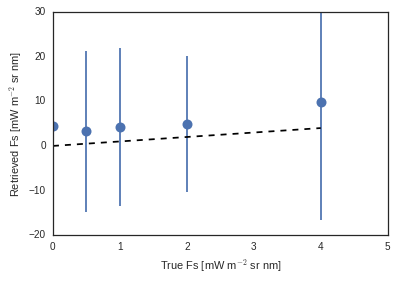

In [233]:
realFs      = [0,0.5,1,2,4]
retrievedFs = [] 
std         = [] 

for i in range(0,801,200):
    
    mean = (df400_Fs['Fs'][i:i+200]*1000).mean()
    stdd  = (df400_Fs['Fs'][i:i+200]*1000).std()
    
    print i,'-',i+200, mean
    retrievedFs.append(mean)
    std.append(stdd)

plt.errorbar(realFs,retrievedFs, yerr=std,fmt='o',markersize=10)
plt.plot(realFs,[0,0.5,1,2,4],'--',color='k')
plt.ylim(-20,30)
plt.xlim(0,5)
plt.ylabel('Retrieved Fs [mW m$^{-2}$ sr nm]')
plt.xlabel('True Fs [mW m$^{-2}$ sr nm]')